# Script to ramp HV for PSRD066 at SwissFEL ATHOS

In [5]:
import epics as ep
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output, display
%matplotlib notebook

def updateplot(ax, x,y,tex,colors=['b'], ):
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(y)
    else:
        for color in colors:
            ax.set_title(title)
            ax.plot(x, y, color)
    fig.canvas.draw()

## User inputs

In [41]:
Device_name = 'SATFE10-PSRD066'
Max_set_screen = 3000 # in volts
Max_set_MCP_front = 1500 # in volts
steps = 50
rest_time = 60 # in seconds
time = np.linspace(0,rest_time*steps, steps)
print('Total rise time %.1f[S], %.1f[min], Screen: %.1f V/s, MCP: %.1f V/s'%(steps*rest_time,steps*rest_time/60, Max_set_screen/(steps*rest_time), Max_set_MCP_front/(steps*rest_time)))

Total rise time 3000.0[S], 50.0[min], Screen: 1.0 V/s, MCP: 0.5 V/s


## Ramp voltage

In [42]:
MCP_Front_SP_PV = Device_name +':V-CH0-SP'
Screen_SP_PV = Device_name +':V-CH1-SP'

MCP_Front_V_RB_PV = Device_name +':V-CH0'
Screen_V_RB_PV = Device_name +':V-CH1'

MCP_Front_I_RB_PV = Device_name +':I-CH0'
Screen_I_RB_PV = Device_name +':I-CH1'

MCP_Front_steps = np.linspace(0,Max_set_MCP_front,steps)
Screen_steps = np.linspace(0,Max_set_screen,steps)

MCP_Front_V_RB = []
Screen_V_RB = []
MCP_Front_I_RB = []
Screen_I_RB = []

for i in range(0,steps):
    counter += 1
    clear_output(wait=True)
    # set values
    ep.caput(MCP_Front_SP_PV, MCP_Front_steps[i])
    ep.caput(Screen_SP_PV, Screen_steps[i])
    
    # read read backs
    MCP_Front_V_RB.append(ep.caget(MCP_Front_V_RB_PV))
    Screen_V_RB.append(ep.caget(Screen_V_RB_PV))
    MCP_Front_I_RB.append(ep.caget(MCP_Front_I_RB_PV))
    Screen_I_RB.append(ep.caget(Screen_I_RB_PV))
    
    # display
    print('Set MCP voltage ' +str(MCP_Front_steps[i]) + ' V, set screen voltage ' +str(Screen_steps[i]) + 'V, step number '+ str(i+1) + ' of ' + str(steps))
    sleep(rest_time)
    
MCP_Front_V_RB = np.asarray(MCP_Front_V_RB)
Screen_V_RB = np.asarray(Screen_V_RB)
MCP_Front_I_RB = np.asarray(MCP_Front_I_RB)
Screen_I_RB = np.asarray(Screen_I_RB)

Set MCP voltage 1500.0 V, set screen voltage 3000.0V, step number 50 of 50


## Plot results

<IPython.core.display.Javascript object>


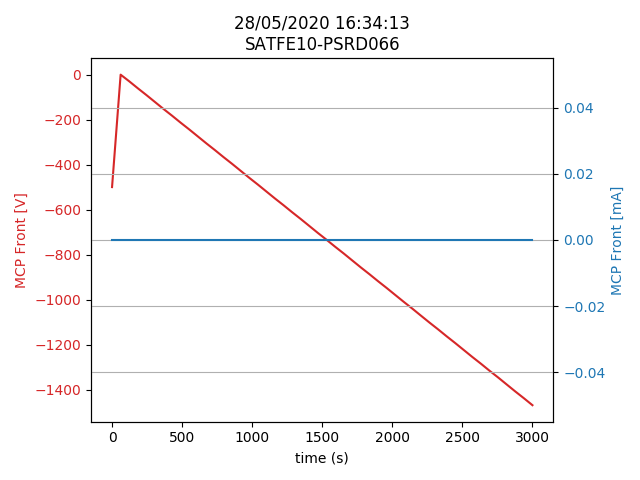

<IPython.core.display.Javascript object>


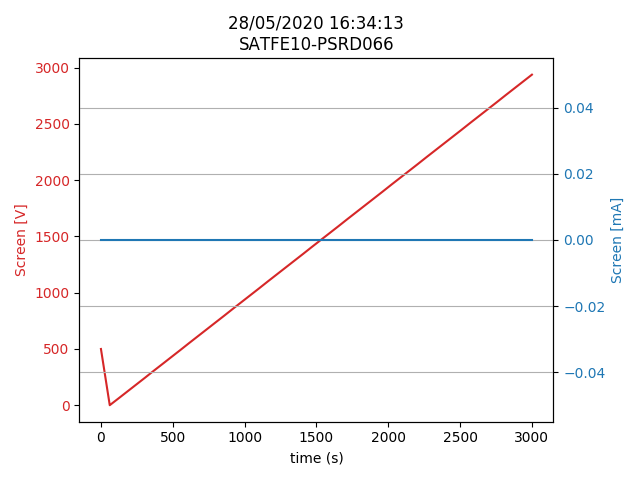

In [44]:
from datetime import datetime

now = datetime.now()

fig, ax1 = plt.subplots()
plt.title(now.strftime("%d/%m/%Y %H:%M:%S") +'\n'+Device_name)
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('MCP Front [V]', color=color)
ax1.plot(time, MCP_Front_V_RB, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('MCP Front [mA]', color=color)  
ax2.plot(time, MCP_Front_I_RB, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(True)
fig.tight_layout()

fig, ax1 = plt.subplots()
plt.title(now.strftime("%d/%m/%Y %H:%M:%S") +'\n'+Device_name)
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Screen [V]', color=color)
ax1.plot(time, Screen_V_RB, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Screen [mA]', color=color)  
ax2.plot(time, Screen_I_RB, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid(True)
fig.tight_layout()  

## Save data

In [43]:
!pwd 

/gfa/.mounts/sf_alvra/config/src/python/photodiag/PhotonDiagControl/Athos


In [ ]:
from IPython import display
import time
from bsread import source
import matplotlib.pyplot as plt
%matplotlib notebook

plot_flag = True
plot_every = 1
time = 0

with source(channels=['SLAAR11-LCAM-C422:FPICTURE.roi_signal_x_profile', 'SLAAR11-LCAM-C422:FPICTURE.roi_background_x_profile']) as stream:
    counter = 0
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(111)
    while True:
        counter += 1
        message = stream.receive()
        signal = message.data.data['SLAAR11-LCAM-C422:FPICTURE.roi_signal_x_profile'].value
        bkground = message.data.data['SLAAR11-LCAM-C422:FPICTURE.roi_background_x_profile'].value
        time += 0.2
        if plot_flag:
            plot_flag = False
            line1, = ax.plot(signal)
            line2, = ax.plot(bkground)
            fig.show()

        if counter >= plot_every:
            line1.set_ydata(signal)
            line2.set_ydata(bkground)
#             plt.title(message.data.pulse_id)
            plt.title(time)
            fig.canvas.draw()
            counter = 0

In [ ]:
MCP_Front_SP_PV = Device_name +':V-CH0-SP'
Screen_SP_PV = Device_name +':V-CH1-SP'
MCP_Front_I_RB_PV = Device_name +':I-CH0'
Screen_I_RB_PV = Device_name +':I-CH1'

MCP_Front_steps = np.linspace(0,Max_set_MCP_front,steps)
Screen_steps = np.linspace(0,Max_set_screen,steps)

# fig = plt.figure()
# fig,ax = plt.subplots(1,1)
# ax.set_xlabel('Step')
# ax.set_ylabel('Value')
# ax.set_ylim(0,Max_set_screen)
# ax.set_xlim(0,steps)
# fig.canvas.draw()
# plot_flag = True
# plot_every = 1
# counter = 0

# ax = fig.add_subplot(111)
# line1, = ax.plot(1, 1, 'r-')
MCP_Front

for i in range(0,steps):
    counter += 1
    clear_output(wait=True)
    ep.caput(Screen_SP_PV, Screen_steps[i])
#     title1 = 'Set MCP voltage ' +str(MCP_Front_steps[i]) + ' V, set screen voltage ' +str(Screen_steps[i]) + 'V, step number '+ str(i+1) + ' of ' + str(steps)
#     if plot_flag:
#         plot_flag = False
#         line1, = ax.plot(np.arange(0,i+1),Screen_steps[0:i+1])
# #         line2, = ax.plot(bkground)
#         fig.show()
#     if counter >= plot_every:
#         line1.set_xdata(np.arange(0,i+1))
#         line1.set_ydata(Screen_steps[0:i+1])
#         fig.canvas.draw()
#         counter = 0
    print('Set MCP voltage ' +str(MCP_Front_steps[i]) + ' V, set screen voltage ' +str(Screen_steps[i]) + 'V, step number '+ str(i+1) + ' of ' + str(steps))
#     updateplot(ax,np.arange(0,i+1),Screen_steps[0:i+1], title1)
#     ax.plot(np.arange(0,i+1),Screen_steps[0:i+1])
#     line1.set_xdata(np.arange(0,i+1))
#     line1.set_ydata(Screen_steps[0:i+1])
#     fig.canvas.draw()
#     fig.canvas.flush_events()
#     display(plt.gcf())
#     clear_output(wait=True)
    sleep(rest_time)